## AOJ Features

In [1]:
import numpy as np
import json
import torch

import matplotlib.pyplot as plt
from datamodules.aoj import AspenOpenJets

aoj = AspenOpenJets(
    data_dir="/home/df630/Multimodal-Bridges/data/aoj", data_files="RunG_batch0.h5"
)

data, metadata = aoj(
    num_jets=100_000,
    download=False,
    features={"continuous": ["pt", "eta_rel", "phi_rel"], "discrete": "tokens"},
)


/home/df630/Multimodal-Bridges/multimodal_bridges/datamodules/aoj.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  list_discrete_feats.append(torch.tensor(feats[features["discrete"]]))


In [2]:
from datamodules.utils import JetFeatures, ParticleClouds

jets = JetFeatures(data)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
#--------------------------------------------------------------------------
#                         FastJet release 3.4.2
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPY

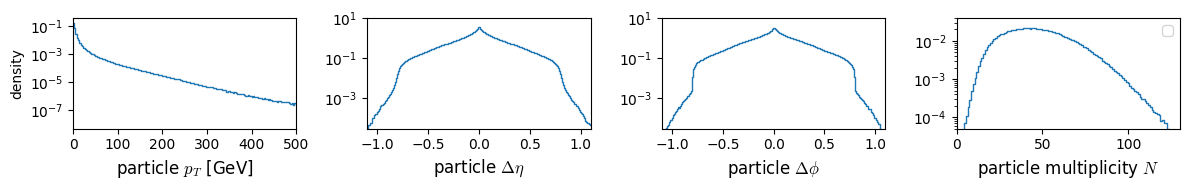

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch  # For tensor to numpy conversion if needed
from matplotlib.lines import Line2D

_, ax = plt.subplots(1, 4, figsize=(12, 2.))

fill = False
alpha = 1

jets.constituents.histplot('pt',ax=ax[0], fill=fill, alpha=alpha, binrange=(-10, 700), binwidth=3,log_scale=(False, True),  stat='density', lw=1)
jets.constituents.histplot("eta_rel",  ax=ax[1], fill=fill, alpha=alpha, binrange=(-1.1, 1.1), binwidth=0.01, log_scale=(False, True),  stat='density', lw=1)
jets.constituents.histplot("phi_rel", ax=ax[2], fill=fill, alpha=alpha, binrange=(-1.1, 1.1), binwidth=0.01, log_scale=(False, True) , stat='density', lw=1)
jets.constituents.histplot("multiplicity", apply_map=None, ax=ax[3], fill=fill, alpha=alpha, binrange=(0, 150), discrete=True, log_scale=(False, True) , stat='density', lw=1)

ax[0].set_xlim(-1, 500)
ax[0].set_xticks([0,100,200,300,400,500])
ax[0].set_yticks([1e-7, 1e-5, 1e-3, 1e-1])
ax[0].set_ylabel('density', fontsize=10)
ax[0].set_xlabel('particle $p_T$ [GeV]', fontsize=12)


ax[1].set_xlim(-1.1, 1.1)
ax[1].set_ylim(3e-5, 10)
ax[1].set_xlabel('particle $\Delta\eta$', fontsize=12)

ax[2].set_xlim(-1.1, 1.1)
ax[2].set_ylim(3e-5, 10)
ax[2].set_xlabel('particle $\Delta\phi$', fontsize=12)

ax[3].set_xlim(0, 130)
ax[3].set_ylim(5e-5, 0.04)
ax[3].set_xlabel('particle multiplicity $N$', fontsize=12)

plt.tight_layout()
plt.legend(loc='upper right', fontsize=10)
plt.savefig("plots/particle_continuous_feats.png", dpi=1000)

plt.show()

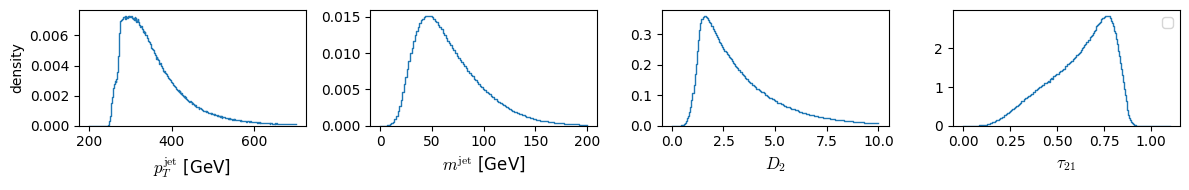

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch  # For tensor to numpy conversion if needed
from matplotlib.lines import Line2D

_, ax = plt.subplots(1, 4, figsize=(12, 2.))

fill = False
alpha = 1

jets.histplot('pt',ax=ax[0], fill=fill, alpha=alpha, binrange=(200, 700), binwidth=1,  stat='density', lw=1)
jets.histplot("m", ax=ax[1], fill=fill, alpha=alpha, binrange=(0, 200), binwidth=1.5, stat='density', lw=1)
jets.histplot("d2", ax=ax[2], fill=fill, alpha=alpha, binrange=(0, 10), binwidth=0.05, stat='density', lw=1)
jets.histplot("tau21", ax=ax[3], fill=fill, alpha=alpha, binrange=(0, 1.1), binwidth=0.005, stat='density', lw=1)


ax[0].set_ylabel('density', fontsize=10)
ax[0].set_xlabel(r'$p_T^{\rm jet}$ [GeV]', fontsize=12)

ax[1].set_xlabel(r'$m^{\rm jet}$ [GeV]', fontsize=12)

ax[2].set_xlabel(r'$D_2$', fontsize=12)

ax[3].set_xlabel(r'$\tau_{21}$', fontsize=12)

plt.tight_layout()
plt.legend(loc='upper right', fontsize=10)
plt.savefig("plots/jet_continuous_feats.png", dpi=1000)

plt.show()

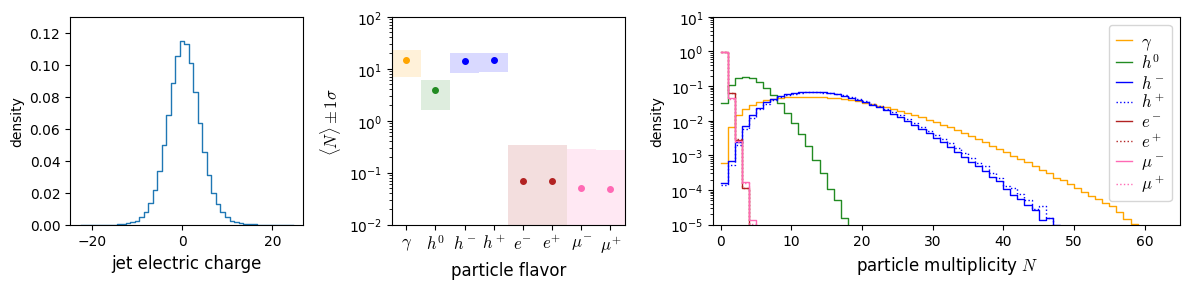

In [8]:
_, ax = plt.subplots(1, 3, figsize=(12, 3), gridspec_kw={'width_ratios':[1,1,2]})

jets.histplot("charge", discrete=True, ax=ax[0],  label="electric charge", stat='density', fill=False, lw=1)


jets.plot_flavor_count_per_jet(
    markersize=8,

    color=[
        "orange",
        "forestgreen",
        "blue",
        "blue",
        "firebrick",
        "firebrick",
        "hotpink",
        "hotpink",
        "hotpink",
    ],
    ax=ax[1],
)

fill = False
alpha = 1 

jets.constituents.histplot('num_Photon',ax=ax[2], fill=fill, alpha=alpha, binrange=(0, 100), binwidth=1,log_scale=(False, True),  stat='density', color='orange',lw=1,  label=r'$\gamma$')
jets.constituents.histplot("num_NeutralHadron",  ax=ax[2], fill=fill, alpha=alpha, binrange=(0, 100), binwidth=1, log_scale=(False, True),  stat='density', color='forestgreen',lw=1,  label=r'$h^0$')
jets.constituents.histplot("num_NegativeHadron", ax=ax[2], fill=fill, alpha=alpha, binrange=(0, 100), binwidth=1, log_scale=(False, True) , stat='density', color='blue', lw=1, label=r'$h^-$')
jets.constituents.histplot("num_PositiveHadron",  ax=ax[2], fill=fill, alpha=alpha, binrange=(0, 100), binwidth=1, log_scale=(False, True), ls=':', stat='density', color='blue', lw=1, label=r'$h^+$')
jets.constituents.histplot("num_Electron", ax=ax[2], fill=fill, alpha=alpha, binrange=(0, 100),binwidth=1, log_scale=(False, True),  stat='density', color='firebrick', lw=1,  label=r'$e^-$')
jets.constituents.histplot("num_Positron", ax=ax[2], fill=fill, alpha=alpha, binrange=(0, 100),binwidth=1, log_scale=(False, True),  stat='density', color='firebrick', lw=1, ls=':', label=r'$e^+$')
jets.constituents.histplot("num_Muon", ax=ax[2], fill=fill, alpha=alpha, binrange=(0, 100),binwidth=1, log_scale=(False, True),  stat='density', color='hotpink', lw=1, label=r'$\mu^-$')
jets.constituents.histplot("num_AntiMuon", ax=ax[2], fill=fill, alpha=alpha, binrange=(0, 100),binwidth=1, log_scale=(False, True),  stat='density', color='hotpink', lw=1, ls=':', label=r'$\mu^+$')

ax[1].set_xlim(-0.5,7.5)
ax[1].set_ylim(0.01,100)
ax[2].set_ylim(1e-5,10)
ax[2].set_xlim(-1,65)
ax[0].set_ylim(0.0,0.13)

ax[1].set_xlabel('particle flavor', fontsize=12)
ax[2].set_xlabel('particle multiplicity $N$', fontsize=12)
ax[2].set_ylabel('density', fontsize=10)
ax[0].set_xlabel('jet electric charge', fontsize=12)
ax[0].set_ylabel('density', fontsize=10)
ax[2].legend(fontsize=12, loc="upper right", handletextpad=0.5, handlelength=1., labelspacing=0.1)

plt.tight_layout()
plt.savefig("particle_discrete_feats.png", dpi=1000)


plt.show()

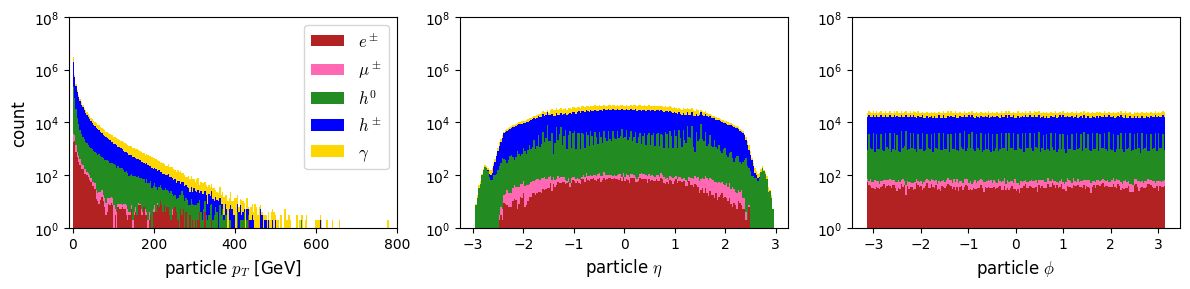

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch  # For tensor to numpy conversion if needed
from matplotlib.lines import Line2D

flavors = [
    "Electron",
    "Muon",
    "NeutralHadron",
    "ChargedHadron",
    "Photon",
]

flavor_colors = {
    "Photon": "gold",
    "NeutralHadron": "forestgreen",
    "ChargedHadron": "blue",
    "Electron": "firebrick",
    "Muon": "hotpink",
}

flavor_labels = {
    "Photon": r"$\gamma$",
    "NeutralHadron": r"$h^{0}$",
    "ChargedHadron": r"$h^\pm$",
    "Electron": r"$e^\pm$",
    "Muon": r"$\mu^\pm$",
}

colors = [flavor_colors[flavor] for flavor in flavors]
labels = [flavor_labels[flavor] for flavor in flavors]
features = ["pt", "eta", "phi"]

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for ax, feature in zip(axes, features):
    data_list = []

    for flavor in flavors:
        feature_data = getattr(jets, f"{feature}_{flavor}")
        if isinstance(feature_data, torch.Tensor):
            feature_data = feature_data.detach().cpu().numpy()
        data_list.append(feature_data)

    if feature == "pt":
        all_data = np.concatenate(data_list)
        positive_data = all_data[all_data > 0]
        xmin = positive_data.min() if positive_data.size > 0 else 1e-2
        xmax = all_data.max() if all_data.size > 0 else 10
        bins = 300
        ax.set_yscale("log")
        xlabel = r"particle $p_T$ [GeV]"

    elif feature == "eta":
        bins = 200
        ax.set_yscale("log")
        xlabel = "particle $\eta$"

    elif feature == "phi":
        bins = 200
        ax.set_yscale("log")
        xlabel = "particle $\phi$"

    ax.hist(
        data_list, bins=bins, stacked=True, label=labels, color=colors, edgecolor=None
    )

    ax.set_ylim(1, 1e8)
    axes[0].set_xlim(-10, 800)
    ax.set_xlabel(xlabel, fontsize=12)
    axes[0].set_ylabel("count", fontsize=12)
    axes[0].legend(fontsize=12, loc="upper right")

plt.tight_layout()
plt.savefig("particle_feats.png", dpi=1000)
plt.show()


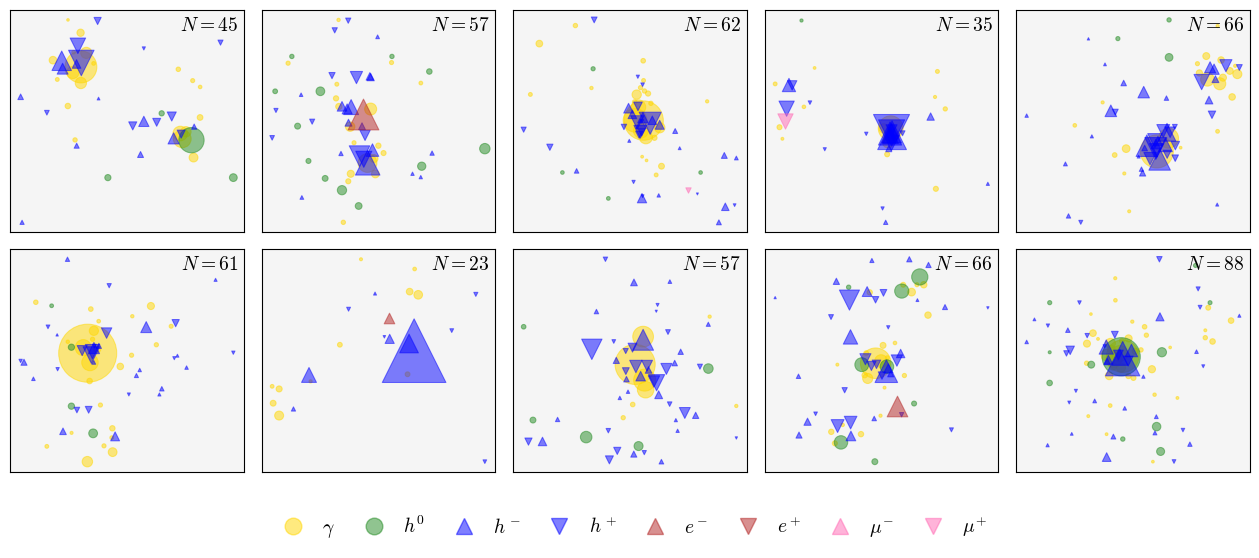

In [12]:
_, ax = plt.subplots(2, 5, figsize=(16, 6), gridspec_kw={'wspace':0.075, 'hspace': 0.075})

jets.display_cloud(104, scale_marker=10, ax=ax[0, 0], display_N=True)
jets.display_cloud(164, scale_marker=10, ax=ax[0, 1], display_N=True)
jets.display_cloud(184, scale_marker=10, ax=ax[0, 2], display_N=True)
jets.display_cloud(1, scale_marker=10, ax=ax[0, 3], display_N=True)
jets.display_cloud(115, scale_marker=10, ax=ax[0, 4], display_N=True)
jets.display_cloud(13, scale_marker=10, ax=ax[1, 0], display_N=True)
jets.display_cloud(107, scale_marker=10, ax=ax[1, 1], display_N=True)
jets.display_cloud(2222, scale_marker=10, ax=ax[1, 2], display_N=True, legend=True)
jets.display_cloud(177, scale_marker=10, ax=ax[1, 3], display_N=True)
jets.display_cloud(3657, scale_marker=10, ax=ax[1, 4], display_N=True)

# plt.tight_layout()
plt.savefig("plots/particle_clouds.png", dpi=1000)


### Token ocurrence per jet

In [14]:
token_freqs = torch.tensor(
    [
        (jets.isPhoton.sum(dim=1) / jets.multiplicity.squeeze(-1)).mean(),
        (jets.isNeutralHadron.sum(dim=1) / jets.multiplicity.squeeze(-1)).mean(),
        (jets.isNegativeHadron.sum(dim=1) / jets.multiplicity.squeeze(-1)).mean(),
        (jets.isPositiveHadron.sum(dim=1) / jets.multiplicity.squeeze(-1)).mean(),
        (jets.isElectron.sum(dim=1) / jets.multiplicity.squeeze(-1)).mean(),
        (jets.isPositron.sum(dim=1) / jets.multiplicity.squeeze(-1)).mean(),
        (jets.isMuon.sum(dim=1) / jets.multiplicity.squeeze(-1)).mean(),
        (jets.isAntiMuon.sum(dim=1) / jets.multiplicity.squeeze(-1)).mean(),
    ]
)

In [15]:
token_freqs

tensor([0.3040, 0.0847, 0.2986, 0.3078, 0.0013, 0.0014, 0.0011, 0.0010])

In [11]:
(1 - token_freqs) / (1 - token_freqs).sum()

tensor([0.0994, 0.1308, 0.1002, 0.0989, 0.1427, 0.1427, 0.1427, 0.1427])

# Flavor

In [1]:
import numpy as np
import json
import torch

import matplotlib.pyplot as plt
from datamodules.aoj import AspenOpenJets

aoj = AspenOpenJets(
    data_dir="/home/df630/Multimodal-Bridges/data/aoj", data_files="RunG_batch0.h5"
)

data, metadata = aoj(
    num_jets=100_000,
    download=False,
    features={"continuous": ["pt", "eta_rel", "phi_rel"], "discrete": "tokens"},
)

/home/df630/Multimodal-Bridges/multimodal_bridges/datamodules/aoj.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  list_discrete_feats.append(torch.tensor(feats[features["discrete"]]))


In [27]:
import numpy as np
import torch
import tqdm as tqdm

class EnergyCorrelationFunctions:

    def __init__(self, data):
        self.data = data
        self.mask_3_parts = data.mask.sum(dim=1).squeeze(-1) >= 3 

    def get_flavor(self, token):
        flavor = self.data.clone()
        flavor_mask = flavor.discrete == token
        flavor.apply_mask(flavor_mask)
        flavor.mask *= flavor_mask 
        del flavor.discrete
        return flavor
        
    def compute_ecf(self, flavor_i, flavor_j=None, beta=1.0):

        flavor = {'photon': 0, 
                  'h0': 1,
                  'h-': 2,
                  'h+': 3,
                  'e-': 4,
                  'e+': 5,
                  'mu-': 6,
                  'mu+': 7,
                  'hadron': 123,
                  'lepton': 4567,
                  'positive':357,
                  'negative':246,
                  'charged': 234567,
                  'h+/-': 23,
                  'e+/-': 45,
                  'mu+/-': 67,
                  'neutral': 10,
                  }
                  
        i = flavor[flavor_i]
        j = flavor[flavor_j] if flavor_j is not None else None

        if flavor_j is None:
            jets = self.get_flavor(i).continuous
            return self._auto_ecf(jets, beta)
        else:
            jets_i = self.get_flavor(i).continuous
            jets_j = self.get_flavor(j).continuous
            return self._cross_ecf(jets_i, jets_j, beta)

    def _auto_ecf(self, tensor, beta=1.0):

        auto_ecf = []
        jet_pT2 = []

        for jet in tensor:
            
            jet = jet[jet[:, 0] != 0]

            if len(jet) < 2:
                # auto_ecf.append(0.0)
                # jet_pT2.append(0.0)
                continue

            pT = jet[:, 0]
            eta = jet[:, 1]
            phi = jet[:, 2]

            pT2 = pT.sum() ** 2

            # Compute pairwise differences
            delta_eta = eta.unsqueeze(1) - eta.unsqueeze(0)
            delta_phi = phi.unsqueeze(1) - phi.unsqueeze(0)
            delta_phi = torch.remainder(delta_phi + torch.pi, 2 * torch.pi) - torch.pi

            # Compute pairwise distances
            R_ij = torch.sqrt(delta_eta**2 + delta_phi**2) ** beta

            ecf_matrix = (pT.unsqueeze(1) * pT.unsqueeze(0)) * R_ij / 2.0
            ecf = ecf_matrix.sum() / pT2

            auto_ecf.append(ecf.item())
            jet_pT2.append(pT2.item())

        auto_ecf = torch.tensor(auto_ecf)[self.mask_3_parts]
        jet_pT2 = torch.tensor(jet_pT2)[self.mask_3_parts]

        return auto_ecf, jet_pT2


    def _cross_ecf(self, tensor_1, tensor_2, beta=1.0):

        cross_ecf = []
        jet_pT2 = []

        for idx, jet in enumerate(tensor_1):

            j0 = jet[jet[:, 0] != 0]
            j1 = tensor_2[idx][tensor_2[idx][:, 0] != 0]

            if len(jet) == 0  or len(jet) == 0:
                # cross_ecf.append(0.0)
                # jet_pT2.append(0.0)
                continue

            pT_0, eta_0, phi_0 = j0[:, 0], j0[:, 1], j0[:, 2]
            pT_1, eta_1, phi_1 = j1[:, 0], j1[:, 1], j1[:, 2]

            pT2 = pT_0.sum() * pT_1.sum()

            delta_eta = eta_0.unsqueeze(1) - eta_1.unsqueeze(0)
            delta_phi = phi_0.unsqueeze(1) - phi_1.unsqueeze(0)
            delta_phi = torch.remainder(delta_phi + np.pi, 2 * np.pi) - np.pi

            R_ij = torch.sqrt(delta_eta**2 + delta_phi**2) ** beta

            ecf_matrix = (pT_0.unsqueeze(1) * pT_1.unsqueeze(0)) * R_ij
            ecf = ecf_matrix.sum() / pT2

            cross_ecf.append(ecf.item())
            jet_pT2.append(pT2.item())

        cross_ecf = torch.tensor(cross_ecf)[self.mask_3_parts]
        jet_pT2 = torch.tensor(jet_pT2)[self.mask_3_parts]

        return cross_ecf, jet_pT2

In [14]:
ecf = EnergyCorrelationFunctions(data)

In [15]:
ecf_00, pT2_00 = ecf.compute_ecf('photon')
ecf_01, pT2_01 = ecf.compute_ecf('photon', 'h0')
ecf_02, pT2_02 = ecf.compute_ecf('photon', 'h-')
ecf_03, pT2_03 = ecf.compute_ecf('photon', 'h+')
ecf_04, pT2_04 = ecf.compute_ecf('photon', 'e-')
ecf_05, pT2_05 = ecf.compute_ecf('photon', 'e+')
ecf_06, pT2_06 = ecf.compute_ecf('photon', 'mu-')
ecf_07, pT2_07 = ecf.compute_ecf('photon', 'mu+')

ecf_11, pT2_11 = ecf.compute_ecf('h0')
ecf_12, pT2_12 = ecf.compute_ecf('h0', 'h-')
ecf_13, pT2_13 = ecf.compute_ecf('h0', 'h+')
ecf_14, pT2_14 = ecf.compute_ecf('h0', 'e-')
ecf_15, pT2_15 = ecf.compute_ecf('h0', 'e+')
ecf_16, pT2_16 = ecf.compute_ecf('h0', 'mu-')
ecf_17, pT2_17 = ecf.compute_ecf('h0', 'mu+')

ecf_22, pT2_22 = ecf.compute_ecf('h-')
ecf_23, pT2_23 = ecf.compute_ecf('h-', 'h+')
ecf_24, pT2_24 = ecf.compute_ecf('h-', 'e-')
ecf_25, pT2_25 = ecf.compute_ecf('h-', 'e+')
ecf_26, pT2_26 = ecf.compute_ecf('h-', 'mu-')
ecf_27, pT2_27 = ecf.compute_ecf('h-', 'mu+')

ecf_33, pT2_33 = ecf.compute_ecf('h+')
ecf_34, pT2_34 = ecf.compute_ecf('h+', 'e-')
ecf_35, pT2_35 = ecf.compute_ecf('h+', 'e+')
ecf_36, pT2_36 = ecf.compute_ecf('h+', 'mu-')
ecf_37, pT2_37 = ecf.compute_ecf('h+', 'mu+')

ecf_44, pT2_44 = ecf.compute_ecf('e-')
ecf_45, pT2_45 = ecf.compute_ecf('e-', 'e+')
ecf_46, pT2_46 = ecf.compute_ecf('e-', 'mu-')
ecf_47, pT2_47 = ecf.compute_ecf('e-', 'mu+')

ecf_55, pT2_55 = ecf.compute_ecf('e+')
ecf_56, pT2_56 = ecf.compute_ecf('e+', 'mu-')
ecf_57, pT2_57 = ecf.compute_ecf('e+', 'mu+')

ecf_66, pT2_66 = ecf.compute_ecf('mu-')
ecf_67, pT2_67 = ecf.compute_ecf('mu-', 'mu+')

ecf_77, pT2_77 = ecf.compute_ecf('mu+')


In [16]:
ecf_00 = torch.nan_to_num(ecf_00, nan=0.0)
ecf_11 = torch.nan_to_num(ecf_11, nan=0.0)
ecf_22 = torch.nan_to_num(ecf_22, nan=0.0)
ecf_33 = torch.nan_to_num(ecf_33, nan=0.0)
ecf_44 = torch.nan_to_num(ecf_44, nan=0.0)
ecf_55 = torch.nan_to_num(ecf_55, nan=0.0)
ecf_66 = torch.nan_to_num(ecf_66, nan=0.0)
ecf_77 = torch.nan_to_num(ecf_77, nan=0.0)

ecf_01 = torch.nan_to_num(ecf_01, nan=0.0)
ecf_02 = torch.nan_to_num(ecf_02, nan=0.0)
ecf_03 = torch.nan_to_num(ecf_03, nan=0.0)
ecf_04 = torch.nan_to_num(ecf_04, nan=0.0)
ecf_05 = torch.nan_to_num(ecf_05, nan=0.0)
ecf_06 = torch.nan_to_num(ecf_06, nan=0.0)
ecf_07 = torch.nan_to_num(ecf_07, nan=0.0)

ecf_12 = torch.nan_to_num(ecf_12, nan=0.0)
ecf_13 = torch.nan_to_num(ecf_13, nan=0.0)
ecf_14 = torch.nan_to_num(ecf_14, nan=0.0)
ecf_15 = torch.nan_to_num(ecf_15, nan=0.0)
ecf_16 = torch.nan_to_num(ecf_16, nan=0.0)
ecf_17 = torch.nan_to_num(ecf_17, nan=0.0)

ecf_23 = torch.nan_to_num(ecf_23, nan=0.0)
ecf_24 = torch.nan_to_num(ecf_24, nan=0.0)
ecf_25 = torch.nan_to_num(ecf_25, nan=0.0)
ecf_26 = torch.nan_to_num(ecf_26, nan=0.0)
ecf_27 = torch.nan_to_num(ecf_27, nan=0.0)

ecf_34 = torch.nan_to_num(ecf_34, nan=0.0)
ecf_35 = torch.nan_to_num(ecf_35, nan=0.0)
ecf_36 = torch.nan_to_num(ecf_36, nan=0.0)
ecf_37 = torch.nan_to_num(ecf_37, nan=0.0)

ecf_45 = torch.nan_to_num(ecf_45, nan=0.0)
ecf_46 = torch.nan_to_num(ecf_46, nan=0.0)
ecf_47 = torch.nan_to_num(ecf_47, nan=0.0)

ecf_56 = torch.nan_to_num(ecf_56, nan=0.0)
ecf_57 = torch.nan_to_num(ecf_57, nan=0.0)

ecf_67 = torch.nan_to_num(ecf_67, nan=0.0)



In [17]:
ecf_0 = pT2_00 * ecf_00 + pT2_01 * ecf_01 + pT2_02 * ecf_02 + pT2_03 * ecf_03 + pT2_04 * ecf_04 + pT2_05 * ecf_05 + pT2_06 * ecf_06 + pT2_07 * ecf_07
ecf_1 = pT2_11 * ecf_11 + pT2_12 * ecf_12 + pT2_13 * ecf_13 + pT2_14 * ecf_14 + pT2_15 * ecf_15 + pT2_16 * ecf_16 + pT2_17 * ecf_17
ecf_2 = pT2_22 * ecf_22 + pT2_23 * ecf_23 + pT2_24 * ecf_24 + pT2_25 * ecf_25 + pT2_26 * ecf_26 + pT2_27 * ecf_27
ecf_3 = pT2_33 * ecf_33 + pT2_34 * ecf_34 + pT2_35 * ecf_35 + pT2_36 * ecf_36 + pT2_37 * ecf_37
ecf_4 = pT2_44 * ecf_44 + pT2_45 * ecf_45 + pT2_46 * ecf_46 + pT2_47 * ecf_47
ecf_5 = pT2_55 * ecf_55 + pT2_56 * ecf_56 + pT2_57 * ecf_57
ecf_6 = pT2_66 * ecf_66 + pT2_67 * ecf_67
ecf_7 = pT2_77 * ecf_77

pT_tot = pT2_00.sqrt() + pT2_11.sqrt() + pT2_22.sqrt() + pT2_33.sqrt() + pT2_44.sqrt() + pT2_55.sqrt() + pT2_66.sqrt() + pT2_77.sqrt()

ecf = (ecf_0 + ecf_1 + ecf_2 + ecf_3 + ecf_4 + ecf_5 + ecf_6 + ecf_7) / pT_tot**2


Text(0.5, 0, '2-point ECF')

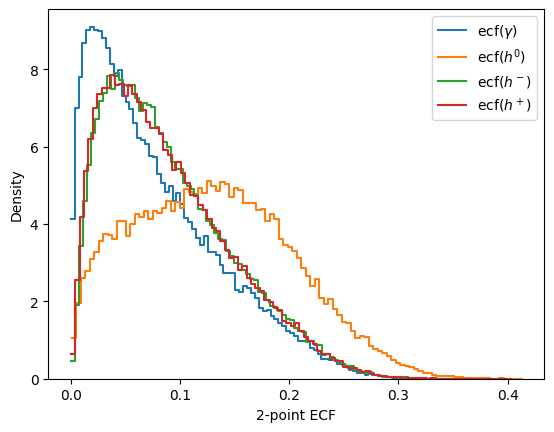

In [18]:
import seaborn as sns

sns.histplot(ecf_00[ecf_00 > 0], bins=100, fill=False, element='step', label=r'ecf($\gamma$)', stat='density')
sns.histplot(ecf_11[ecf_11 > 0], bins=100, fill=False, element='step', label=r'ecf($h^0$)', stat='density')
sns.histplot(ecf_22[ecf_22 > 0], bins=100, fill=False, element='step', label=r'ecf($h^-$)', stat='density')
sns.histplot(ecf_33[ecf_33 > 0], bins=100, fill=False, element='step', label=r'ecf($h^+$)', stat='density')

plt.legend(fontsize=10)
plt.xlabel('2-point ECF')


Text(0.5, 0, '2-point ECF')

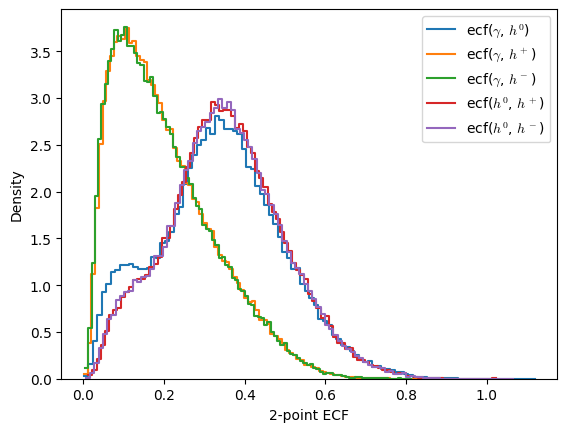

In [21]:
sns.histplot(ecf_01[ecf_01 > 0], bins=100, fill=False, element='step', label=r'ecf($\gamma$, $h^0$)', stat='density')
sns.histplot(ecf_02[ecf_02 > 0], bins=100, fill=False, element='step', label=r'ecf($\gamma$, $h^+$)', stat='density')
sns.histplot(ecf_03[ecf_03 > 0], bins=100, fill=False, element='step', label=r'ecf($\gamma$, $h^-$)', stat='density')
sns.histplot(ecf_12[ecf_12 > 0], bins=100, fill=False, element='step', label=r'ecf($h^0$, $h^+$)', stat='density')
sns.histplot(ecf_13[ecf_13 > 0], bins=100, fill=False, element='step', label=r'ecf($h^0$, $h^-$)', stat='density')

# plt.yscale('log')
plt.legend(fontsize=10)
plt.xlabel('2-point ECF')


In [19]:
from datamodules.utils import JetFeatures, ParticleClouds

jet = JetFeatures(data)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
#--------------------------------------------------------------------------
#                         FastJet release 3.4.2
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPY

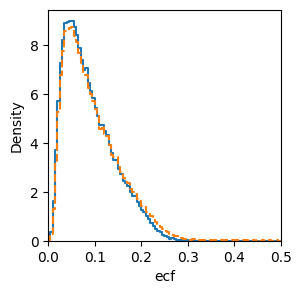

In [20]:
jet.histplot('c1', fill=False, binrange=(0, 0.5), binwidth=0.005, stat='density')
sns.histplot(ecf, fill=False, element='step', binrange=(0, 0.5), ls='--', binwidth=0.005, stat='density')

# log plot
# plt.yscale('log') 
# plt.ylim(1e-3, 100)
plt.xlim(0, 0.5)
plt.xlabel('ecf')

plt.show()

# 1. Examine generated jets

In [114]:
import numpy as np
import json
import torch
import matplotlib.pyplot as plt

from tensorclass import TensorMultiModal
from datamodules.utils import JetFeatures, ParticleClouds
from datamodules.aoj import AspenOpenJets

dir_path = "/home/df630/Multimodal-Bridges/experiments/results/comet/multimodal-jets/"

# with open(dir_path + "/metadata.json", "r") as f:
#     metadata = json.load(f)

test_path = dir_path + "/data/test_sample.h5"
paths_path = dir_path + "/data/paths_sample.h5"

paths = TensorMultiModal.load_from(paths_path)
test = TensorMultiModal.load_from(test_path)

In [2]:
dir_path = "/home/df630/Multimodal-Bridges/experiments/results/comet/multimodal-jets/55ecb2827fa64a69afb1e6331ae3c3d3"

# with open(dir_path + "/metadata.json", "r") as f:
#     metadata = json.load(f)

paths_path = dir_path + "/data/paths_sample.h5"
paths_mjb = TensorMultiModal.load_from(paths_path)


In [54]:
dir_path = "/home/df630/Multimodal-Bridges/experiments/results/comet/multimodal-jets/e62ebbfe5168472192b8768d74e1f54f"

# with open(dir_path + "/metadata.json", "r") as f:
#     metadata = json.load(f)

paths_path = dir_path + "/data/paths_sample.h5"
paths_mjb1 = TensorMultiModal.load_from(paths_path)

In [55]:
paths.shape, paths_mjb.shape, paths_mjb1.shape

(torch.Size([2, 100000, 128]),
 torch.Size([2, 100000, 150]),
 torch.Size([2, 100000, 150]))

In [3]:
gens_mjb = paths_mjb[-1].clone()

gen_mjb_photons = paths_mjb[-1].clone()
gen_mjb_photons.apply_mask(gen_mjb_photons.discrete==0)
gen_mjb_photons = JetFeatures(gen_mjb_photons)

gen_mjb_neutral_hadrons = paths_mjb[-1].clone()
gen_mjb_neutral_hadrons.apply_mask(gen_mjb_neutral_hadrons.discrete==1)
gen_mjb_neutral_hadrons = JetFeatures(gen_mjb_neutral_hadrons)

gen_mjb_charged_hadrons = paths_mjb[-1].clone()
gen_mjb_charged_hadrons.apply_mask((gen_mjb_charged_hadrons.discrete==2) | (gen_mjb_charged_hadrons.discrete==3))
gen_mjb_charged_hadrons = JetFeatures(gen_mjb_charged_hadrons)

gen_mjb_leptons = paths_mjb[-1].clone()
gen_mjb_leptons.apply_mask(gen_mjb_leptons.discrete>=4)
gen_mjb_leptons = JetFeatures(gen_mjb_leptons)


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
#--------------------------------------------------------------------------
#                         FastJet release 3.4.2
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPY

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


In [65]:
gens_mjb1 = paths_mjb1[-1].clone()

gen_mjb1_photons = paths_mjb1[-1].clone()
gen_mjb1_photons.apply_mask(gen_mjb1_photons.discrete==0)
gen_mjb1_photons = JetFeatures(gen_mjb1_photons)

gen_mjb1_neutral_hadrons = paths_mjb1[-1].clone()
gen_mjb1_neutral_hadrons.apply_mask(gen_mjb1_neutral_hadrons.discrete==1)
gen_mjb1_neutral_hadrons = JetFeatures(gen_mjb1_neutral_hadrons)

gen_mjb1_charged_hadrons = paths_mjb1[-1].clone()
gen_mjb1_charged_hadrons.apply_mask((gen_mjb1_charged_hadrons.discrete==2) | (gen_mjb1_charged_hadrons.discrete==3))
gen_mjb1_charged_hadrons = JetFeatures(gen_mjb1_charged_hadrons)

gen_mjb1_leptons = paths_mjb1[-1].clone()
gen_mjb1_leptons.apply_mask(gen_mjb1_leptons.discrete>=4)
gen_mjb1_leptons = JetFeatures(gen_mjb1_leptons)


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


In [115]:
gens = paths[-1].clone()

gen_photons = paths[-1].clone()
gen_photons.apply_mask(gen_photons.discrete==0)
gen_photons = JetFeatures(gen_photons)
test_photons = test.clone()
test_photons.apply_mask(test_photons.discrete==0)
test_photons = JetFeatures(test_photons)

gen_neutral_hadrons = paths[-1].clone()
gen_neutral_hadrons.apply_mask(gen_neutral_hadrons.discrete==1)
gen_neutral_hadrons = JetFeatures(gen_neutral_hadrons)
test_neutral_hadrons = test.clone()
test_neutral_hadrons.apply_mask(test_neutral_hadrons.discrete==1)
test_neutral_hadrons = JetFeatures(test_neutral_hadrons)

gen_charged_hadrons = paths[-1].clone()
gen_charged_hadrons.apply_mask((gen_charged_hadrons.discrete==2) | (gen_charged_hadrons.discrete==3))
gen_charged_hadrons = JetFeatures(gen_charged_hadrons)
test_charged_hadrons = test.clone()
test_charged_hadrons.apply_mask((test_charged_hadrons.discrete==2) | (test_charged_hadrons.discrete==3))
test_charged_hadrons = JetFeatures(test_charged_hadrons)

gen_leptons = paths[-1].clone()
gen_leptons.apply_mask(gen_leptons.discrete>=4)
gen_leptons = JetFeatures(gen_leptons)
test_leptons = test.clone()
test_leptons.apply_mask(test_leptons.discrete>=4)
test_leptons = JetFeatures(test_leptons)



Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch


# Function to plot histograms and ratios
def plot_hist_and_ratio(test, 
                        gen1,  
                        gen2,
                        # gen3,
                        ax_hist, 
                        ax_ratio, 
                        xlim, 
                        ylim,
                        xlabel, 
                        ylabel='',
                        feat=None,
                        num_bins=100, 
                        log_scale=False, 
                        color1=None,
                        color2=None,
                        color3='dodgerblue',
                        color_test='darkslategrey',
                        legend1=None,
                        legend2=None,
                        legend3=None,
                        discrete=False,
                        fill=False,
                        lw=0.75,
                        ls='-',):

    bins = np.linspace(xlim[0], xlim[1], num_bins)  # Adjust binning if necessary
    
    if feat is not None:
        test.histplot(feat, apply_map=lambda test: test[test!=0],  stat='density', fill=fill,bins=bins, alpha=1 if not fill else 0.2, ax=ax_hist, lw=1.25 if not fill else 0.35, color=color_test, label="AOJ", log_scale=log_scale, discrete=discrete)
        gen1.histplot(feat, apply_map=lambda gen1: gen1[gen1!=0],  stat='density', fill=False, bins=bins, ax=ax_hist, ls=ls, lw=lw, color=color1, label=legend1, log_scale=log_scale, discrete=discrete)
        gen2.histplot(feat, apply_map=lambda gen2: gen2[gen2!=0],  stat='density', fill=False, bins=bins, ax=ax_hist, ls=ls, lw=lw, color=color2, label=legend2, log_scale=log_scale, discrete=discrete)
        # gen3.histplot(feat, apply_map=lambda gen3: gen3[gen3!=0],  stat='density', fill=False, bins=bins, ax=ax_hist, ls=ls, lw=lw, color=color3, label=legend3, log_scale=log_scale, discrete=discrete)
        x = getattr(test, feat)
        x = x[x!=0]
        y1 = getattr(gen1, feat)
        y2 = getattr(gen2, feat)
        # y3 = getattr(gen3, feat)
        y1 = y1[y1!=0]
        y2 = y2[y2!=0]
        # y3 = y3[y3!=0]

    else:
        sns.histplot(test[test!=0], stat='density', fill=fill, element='step', bins=bins, ax=ax_hist, alpha=1 if not fill else 0.3, lw=1.25 if not fill else 0.35, color=color_test, label="AOJ", log_scale=log_scale, discrete=discrete)
        sns.histplot(gen1[gen1!=0], stat='density', fill=False, element='step' ,bins=bins, ax=ax_hist, ls=ls, lw=lw, color=color1, label=legend1, log_scale=log_scale, discrete=discrete)
        sns.histplot(gen2[gen2!=0], stat='density', fill=False, element='step' ,bins=bins, ax=ax_hist, ls=ls, lw=lw, color=color2, label=legend2, log_scale=log_scale, discrete=discrete)
        # sns.histplot(gen3[gen3!=0], stat='density', fill=False, element='step' ,bins=bins, ax=ax_hist, ls=ls, lw=lw, color=color3, label=legend3, log_scale=log_scale, discrete=discrete)
        x = test[test!=0]
        y1 = gen1[gen1!=0]
        y2 = gen2[gen2!=0]
        # y3 = gen3[gen3!=0]

    if isinstance(x, torch.Tensor):
        x = x.cpu().numpy()

    if isinstance(y1, torch.Tensor):
        y1 = y1.cpu().numpy()
        y2 = y2.cpu().numpy()
        # y3 = y3.cpu().numpy()

    hist, _ = np.histogram(x, bins=bins, density=True)
    hist1, _ = np.histogram(y1, bins=bins, density=True)
    hist2, _ = np.histogram(y2, bins=bins, density=True)
    # hist3, _ = np.histogram(y3, bins=bins, density=True)
    ratio1 = np.divide(hist1, hist, out=np.ones_like(hist1, dtype=float), where=hist > 0)
    ratio2 = np.divide(hist2, hist, out=np.ones_like(hist2, dtype=float), where=hist > 0)
    # ratio3 = np.divide(hist3, hist, out=np.ones_like(hist3, dtype=float), where=hist > 0)

    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Plot ratio
    ax_ratio.hist(bin_centers, bins=bins, weights=ratio1, histtype="step", color=color1, ls=ls)
    ax_ratio.hist(bin_centers, bins=bins, weights=ratio2, histtype="step", color=color2, ls=ls)
    # ax_ratio.hist(bin_centers, bins=bins, weights=ratio3, histtype="step", color=color3, ls=ls)
    ax_ratio.axhline(1.0, color='gray', linestyle='--', lw=0.5)

    # Format axes
    ax_hist.set_ylabel(ylabel, fontsize=10)
    
    if legend1 is not None:
        ax_hist.legend(fontsize=8)

    ax_ratio.set_ylabel("Ratio", fontsize=8)
    ax_ratio.set_xlabel(xlabel, fontsize=15)
    ax_ratio.set_ylim(0.7, 1.3)
    ax_ratio.set_yticks([0.75, 1.0, 1.25])
    ax_ratio.set_yticklabels([0.75, 1.0, 1.25], fontsize=7)

    ax_hist.set_xlim(*xlim)
    ax_hist.set_ylim(*ylim)
    ax_ratio.set_xlim(*xlim)



In [7]:
import numpy as np
import torch
import tqdm as tqdm

class EnergyCorrelationFunctions:

    def __init__(self, data):
        self.data = data
        self.mask_3_parts = data.mask.sum(dim=1).squeeze(-1) >= 3 

    def get_flavor(self, token):
        flavor = self.data.clone()
        if token == 4567:
            flavor_mask = flavor.discrete >= 4
        else:
            flavor_mask = flavor.discrete == token
        flavor.apply_mask(flavor_mask)
        flavor.mask *= flavor_mask 
        del flavor.discrete
        return flavor
        
    def compute_ecf(self, flavor_i, flavor_j=None, beta=1.0):

        flavor = {'photon': 0, 
                  'h0': 1,
                  'h-': 2,
                  'h+': 3,
                  'e-': 4,
                  'e+': 5,
                  'mu-': 6,
                  'mu+': 7,
                  'hadron': 123,
                  'lepton': 4567,
                  'positive':357,
                  'negative':246,
                  'charged': 234567,
                  'h+/-': 23,
                  'e+/-': 45,
                  'mu+/-': 67,
                  'neutral': 10,
                  }
                  
        i = flavor[flavor_i]
        j = flavor[flavor_j] if flavor_j is not None else None

        if flavor_j is None:
            jets = self.get_flavor(i).continuous
            return self._auto_ecf(jets, beta)
        else:
            jets_i = self.get_flavor(i).continuous
            jets_j = self.get_flavor(j).continuous
            return self._cross_ecf(jets_i, jets_j, beta)

    def _auto_ecf(self, tensor, beta=1.0):

        auto_ecf = []
        jet_pT2 = []

        for jet in tensor:
            
            jet = jet[jet[:, 0] != 0]

            if len(jet) < 2:
                auto_ecf.append(0.0)
                jet_pT2.append(0.0)
                continue

            pT = jet[:, 0]
            eta = jet[:, 1]
            phi = jet[:, 2]

            pT2 = pT.sum() ** 2

            # Compute pairwise differences
            delta_eta = eta.unsqueeze(1) - eta.unsqueeze(0)
            delta_phi = phi.unsqueeze(1) - phi.unsqueeze(0)
            delta_phi = torch.remainder(delta_phi + torch.pi, 2 * torch.pi) - torch.pi

            # Compute pairwise distances
            R_ij = torch.sqrt(delta_eta**2 + delta_phi**2) ** beta

            ecf_matrix = (pT.unsqueeze(1) * pT.unsqueeze(0)) * R_ij / 2.0
            ecf = ecf_matrix.sum() / pT2

            auto_ecf.append(ecf.item())
            jet_pT2.append(pT2.item())

        auto_ecf = torch.tensor(auto_ecf)[self.mask_3_parts]
        jet_pT2 = torch.tensor(jet_pT2)[self.mask_3_parts]

        return auto_ecf, jet_pT2


    def _cross_ecf(self, tensor_1, tensor_2, beta=1.0):

        cross_ecf = []
        jet_pT2 = []

        for idx, jet in enumerate(tensor_1):

            j0 = jet[jet[:, 0] != 0]
            j1 = tensor_2[idx][tensor_2[idx][:, 0] != 0]

            if len(jet) == 0  or len(jet) == 0:
                cross_ecf.append(0.0)
                jet_pT2.append(0.0)
                continue

            pT_0, eta_0, phi_0 = j0[:, 0], j0[:, 1], j0[:, 2]
            pT_1, eta_1, phi_1 = j1[:, 0], j1[:, 1], j1[:, 2]

            pT2 = pT_0.sum() * pT_1.sum()

            delta_eta = eta_0.unsqueeze(1) - eta_1.unsqueeze(0)
            delta_phi = phi_0.unsqueeze(1) - phi_1.unsqueeze(0)
            delta_phi = torch.remainder(delta_phi + np.pi, 2 * np.pi) - np.pi

            R_ij = torch.sqrt(delta_eta**2 + delta_phi**2) ** beta

            ecf_matrix = (pT_0.unsqueeze(1) * pT_1.unsqueeze(0)) * R_ij
            ecf = ecf_matrix.sum() / pT2

            cross_ecf.append(ecf.item())
            jet_pT2.append(pT2.item())

        cross_ecf = torch.tensor(cross_ecf)[self.mask_3_parts]
        jet_pT2 = torch.tensor(jet_pT2)[self.mask_3_parts]

        return cross_ecf, jet_pT2

In [67]:
gen_ecf = EnergyCorrelationFunctions(gens)
gen_mjb_ecf = EnergyCorrelationFunctions(gens_mjb)
gen_mjb1_ecf = EnergyCorrelationFunctions(gens_mjb1)
test_ecf = EnergyCorrelationFunctions(test)

In [9]:
gen_mjb_ecf_00, gen_mjb_pT2_00 = gen_mjb_ecf.compute_ecf('photon')
gen_mjb_ecf_11, gen_mjb_pT2_11 = gen_mjb_ecf.compute_ecf('h0')
gen_mjb_ecf_22, gen_mjb_pT2_22 = gen_mjb_ecf.compute_ecf('h-')
gen_mjb_ecf_33, gen_mjb_pT2_33 = gen_mjb_ecf.compute_ecf('h+')
gen_mjb_ecf_44, gen_mjb_pT2_44 = gen_mjb_ecf.compute_ecf('lepton')

gen_mjb_ecf_01, gen_mjb_pT2_01 = gen_mjb_ecf.compute_ecf('photon', 'h0')
gen_mjb_ecf_02, gen_mjb_pT2_02 = gen_mjb_ecf.compute_ecf('photon', 'h-')
gen_mjb_ecf_03, gen_mjb_pT2_03 = gen_mjb_ecf.compute_ecf('photon', 'h+')
gen_mjb_ecf_04, gen_mjb_pT2_04 = gen_mjb_ecf.compute_ecf('photon', 'lepton')

gen_mjb_ecf_12, gen_mjb_pT2_12 = gen_mjb_ecf.compute_ecf('h0', 'h-')
gen_mjb_ecf_13, gen_mjb_pT2_13 = gen_mjb_ecf.compute_ecf('h0', 'h+')
gen_mjb_ecf_14, gen_mjb_pT2_14 = gen_mjb_ecf.compute_ecf('h0', 'lepton')

gen_mjb_ecf_23, gen_mjb_pT2_23 = gen_mjb_ecf.compute_ecf('h-', 'h+')
gen_mjb_ecf_24, gen_mjb_pT2_24 = gen_mjb_ecf.compute_ecf('h-', 'lepton')

gen_mjb_ecf_34, gen_mjb_pT2_34 = gen_mjb_ecf.compute_ecf('h+', 'lepton')



In [68]:
gen_mjb1_ecf_00, gen_mjb1_pT2_00 = gen_mjb1_ecf.compute_ecf('photon')
gen_mjb1_ecf_11, gen_mjb1_pT2_11 = gen_mjb1_ecf.compute_ecf('h0')
gen_mjb1_ecf_22, gen_mjb1_pT2_22 = gen_mjb1_ecf.compute_ecf('h-')
gen_mjb1_ecf_33, gen_mjb1_pT2_33 = gen_mjb1_ecf.compute_ecf('h+')
gen_mjb1_ecf_44, gen_mjb1_pT2_44 = gen_mjb1_ecf.compute_ecf('lepton')

gen_mjb1_ecf_01, gen_mjb1_pT2_01 = gen_mjb1_ecf.compute_ecf('photon', 'h0')
gen_mjb1_ecf_02, gen_mjb1_pT2_02 = gen_mjb1_ecf.compute_ecf('photon', 'h-')
gen_mjb1_ecf_03, gen_mjb1_pT2_03 = gen_mjb1_ecf.compute_ecf('photon', 'h+')
gen_mjb1_ecf_04, gen_mjb1_pT2_04 = gen_mjb1_ecf.compute_ecf('photon', 'lepton')

gen_mjb1_ecf_12, gen_mjb1_pT2_12 = gen_mjb1_ecf.compute_ecf('h0', 'h-')
gen_mjb1_ecf_13, gen_mjb1_pT2_13 = gen_mjb1_ecf.compute_ecf('h0', 'h+')
gen_mjb1_ecf_14, gen_mjb1_pT2_14 = gen_mjb1_ecf.compute_ecf('h0', 'lepton')

gen_mjb1_ecf_23, gen_mjb1_pT2_23 = gen_mjb1_ecf.compute_ecf('h-', 'h+')
gen_mjb1_ecf_24, gen_mjb1_pT2_24 = gen_mjb1_ecf.compute_ecf('h-', 'lepton')

gen_mjb1_ecf_34, gen_mjb1_pT2_34 = gen_mjb1_ecf.compute_ecf('h+', 'lepton')

In [116]:
gen_ecf_00, gen_pT2_00 = gen_ecf.compute_ecf('photon')
gen_ecf_11, gen_pT2_11 = gen_ecf.compute_ecf('h0')
gen_ecf_22, gen_pT2_22 = gen_ecf.compute_ecf('h-')
gen_ecf_33, gen_pT2_33 = gen_ecf.compute_ecf('h+')
gen_ecf_44, gen_pT2_44 = gen_ecf.compute_ecf('lepton')

gen_ecf_01, gen_pT2_01 = gen_ecf.compute_ecf('photon', 'h0')
gen_ecf_02, gen_pT2_02 = gen_ecf.compute_ecf('photon', 'h-')
gen_ecf_03, gen_pT2_03 = gen_ecf.compute_ecf('photon', 'h+')
gen_ecf_04, gen_pT2_04 = gen_ecf.compute_ecf('photon', 'lepton')

gen_ecf_12, gen_pT2_12 = gen_ecf.compute_ecf('h0', 'h-')
gen_ecf_13, gen_pT2_13 = gen_ecf.compute_ecf('h0', 'h+')
gen_ecf_14, gen_pT2_14 = gen_ecf.compute_ecf('h0', 'lepton')

gen_ecf_23, gen_pT2_23 = gen_ecf.compute_ecf('h-', 'h+')
gen_ecf_24, gen_pT2_24 = gen_ecf.compute_ecf('h-', 'lepton')

gen_ecf_34, gen_pT2_34 = gen_ecf.compute_ecf('h+', 'lepton')

In [11]:
test_ecf_00, test_pT2_00 = test_ecf.compute_ecf('photon')
test_ecf_11, test_pT2_11 = test_ecf.compute_ecf('h0')
test_ecf_22, test_pT2_22 = test_ecf.compute_ecf('h-')
test_ecf_33, test_pT2_33 = test_ecf.compute_ecf('h+')
test_ecf_44, test_pT2_44 = test_ecf.compute_ecf('lepton')

test_ecf_01, test_pT2_01 = test_ecf.compute_ecf('photon', 'h0')
test_ecf_02, test_pT2_02 = test_ecf.compute_ecf('photon', 'h-')
test_ecf_03, test_pT2_03 = test_ecf.compute_ecf('photon', 'h+')
test_ecf_04, test_pT2_04 = test_ecf.compute_ecf('photon', 'lepton')

test_ecf_12, test_pT2_12 = test_ecf.compute_ecf('h0', 'h-')
test_ecf_13, test_pT2_13 = test_ecf.compute_ecf('h0', 'h+')
test_ecf_14, test_pT2_14 = test_ecf.compute_ecf('h0', 'lepton')

test_ecf_23, test_pT2_23 = test_ecf.compute_ecf('h-', 'h+')
test_ecf_24, test_pT2_24 = test_ecf.compute_ecf('h-', 'lepton')

test_ecf_34, test_pT2_34 = test_ecf.compute_ecf('h+', 'lepton')

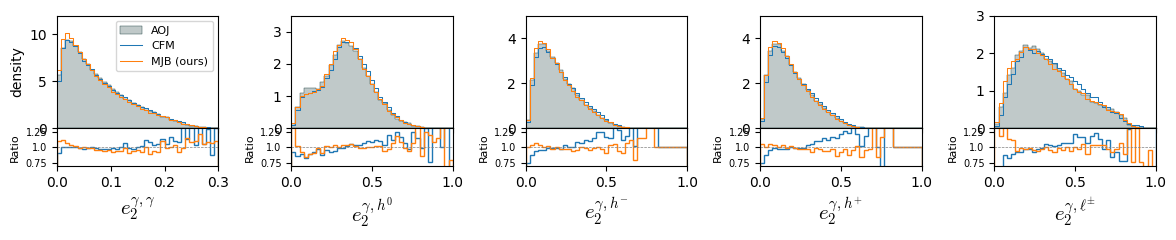

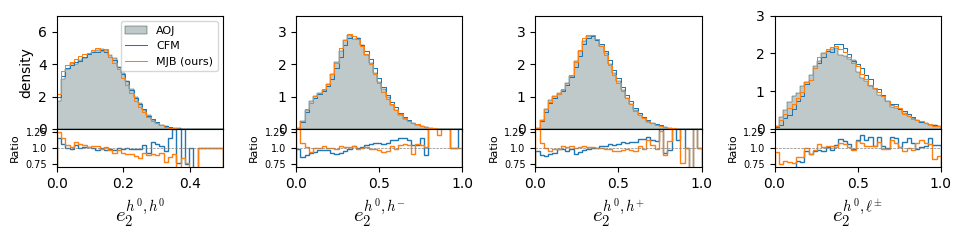

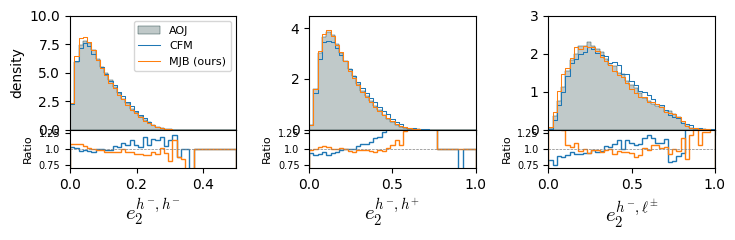

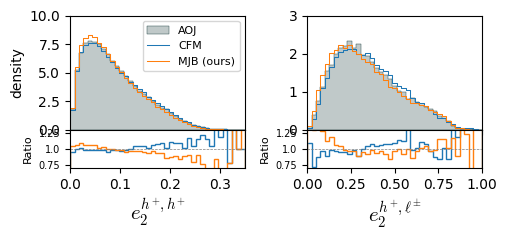

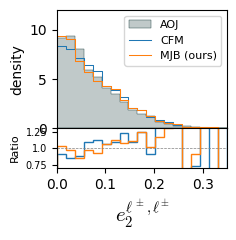

In [128]:
##

fig, axes = plt.subplots(2, 5, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')

num_bins=40
fill=True

plot_hist_and_ratio(test_ecf_00, 
                    gen_ecf_00, 
                    # gen_mjb_ecf_00,  
                    gen_mjb1_ecf_00, 
                    axes[0, 0], axes[1, 0], xlim=(0,.3), ylim=(0, 12), fill=fill, num_bins=num_bins, xlabel=r'$e_{2}^{\gamma,\gamma}$', ylabel='density', legend1='CFM', legend2='MJB (ours)')

plot_hist_and_ratio(test_ecf_01, 
                    gen_ecf_01, 
                    # gen_mjb_ecf_01, 
                    gen_mjb1_ecf_01,
                    axes[0, 1], axes[1, 1], xlim=(0,1), ylim=(0, 3.5),  fill=fill, num_bins=num_bins, xlabel=r'$e_{2}^{\gamma, h^{0}}$')

plot_hist_and_ratio(test_ecf_02, 
                    gen_ecf_02, 
                    # gen_mjb_ecf_02, 
                    gen_mjb1_ecf_02, 
                    axes[0, 2], axes[1, 2], xlim=(0,1), ylim=(0, 5),  fill=fill, num_bins=num_bins, xlabel=r'$e_{2}^{\gamma, h^{-}}$')

plot_hist_and_ratio(test_ecf_03, 
                    gen_ecf_03, 
                    # gen_mjb_ecf_03, 
                    gen_mjb1_ecf_03, 
                    axes[0, 3], axes[1, 3], xlim=(0,1), ylim=(0, 5),  fill=fill, num_bins=num_bins, xlabel=r'$e_{2}^{\gamma, h^{+}}$')

plot_hist_and_ratio(test_ecf_04, 
                    gen_ecf_04, 
                    # gen_mjb_ecf_04, 
                    gen_mjb1_ecf_04, 
                    axes[0, 4], axes[1, 4], xlim=(0,1), ylim=(0, 3),  fill=fill, num_bins=num_bins, xlabel=r'$e_{2}^{\gamma, \ell^{\pm}}$')

plt.tight_layout()
plt.savefig("photons_ecf.png", dpi=500)
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')

plot_hist_and_ratio(test_ecf_11, 
                    gen_ecf_11, 
                    # gen_mjb_ecf_11, 
                    gen_mjb1_ecf_11, 
                    axes[0, 0], axes[1, 0], xlim=(0,.5), ylim=(0, 7),  fill=fill, num_bins=num_bins, xlabel=r'$e_{2}^{h^{0},h^{0}}$', ylabel='density', legend1='CFM', legend2='MJB (ours)')

plot_hist_and_ratio(test_ecf_12, 
                    gen_ecf_12, 
                    # gen_mjb_ecf_12, 
                    gen_mjb1_ecf_12, 
                    axes[0, 1], axes[1, 1], xlim=(0,1), ylim=(0, 3.5), fill=fill,  num_bins=num_bins, xlabel=r'$e_{2}^{h^{0}, h^{-}}$')

plot_hist_and_ratio(test_ecf_13, 
                    gen_ecf_13, 
                    # gen_mjb_ecf_13, 
                    gen_mjb1_ecf_13, 
                    axes[0, 2], axes[1, 2], xlim=(0,1), ylim=(0, 3.5),  fill=fill, num_bins=num_bins, xlabel=r'$e_{2}^{h^{0}, h^{+}}$')

plot_hist_and_ratio(test_ecf_14, 
                    gen_ecf_14, 
                    # gen_mjb_ecf_14, 
                    gen_mjb1_ecf_14, 
                    axes[0, 3], axes[1, 3], xlim=(0,1), ylim=(0, 3),  fill=fill, num_bins=num_bins, xlabel=r'$e_{2}^{h^{0}, \ell^{\pm}}$')

axes[0, 4].remove()
axes[1, 4].remove()

plt.tight_layout()
plt.savefig("neutral_hadron_ecf.png", dpi=500)
plt.show()


fig, axes = plt.subplots(2, 5, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')

plot_hist_and_ratio(test_ecf_22, 
                    gen_ecf_22, 
                    # gen_mjb_ecf_22, 
                    gen_mjb1_ecf_22,  
                    axes[0, 0], axes[1, 0], xlim=(0,.5), ylim=(0, 10), fill=fill,  num_bins=num_bins, xlabel=r'$e_{2}^{h^{-},h^{-}}$', ylabel='density', legend1='CFM', legend2='MJB (ours)')

plot_hist_and_ratio(test_ecf_23, 
                    gen_ecf_23, 
                    # gen_mjb_ecf_23, 
                    gen_mjb1_ecf_23, 
                    axes[0, 1], axes[1, 1], xlim=(0,1), ylim=(0, 4.5),  fill=fill, num_bins=num_bins, xlabel=r'$e_{2}^{h^{-}, h^{+}}$')

plot_hist_and_ratio(test_ecf_24, 
                    gen_ecf_24, 
                    # gen_mjb_ecf_24, 
                    gen_mjb1_ecf_24, 
                    axes[0, 2], axes[1, 2], xlim=(0,1), ylim=(0, 3),  fill=fill, num_bins=num_bins, xlabel=r'$e_{2}^{h^{-}, \ell^{\pm}}$')

axes[0, 3].remove()
axes[0, 4].remove()
axes[1, 3].remove()
axes[1, 4].remove()

plt.tight_layout()
plt.savefig("negative_hadron_ecf.png", dpi=500)
plt.show()


fig, axes = plt.subplots(2, 5, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')


plot_hist_and_ratio(test_ecf_33, 
                    gen_ecf_33, 
                    # gen_mjb_ecf_33, 
                    gen_mjb1_ecf_33, 
                    axes[0, 0], axes[1, 0], xlim=(0,.35), ylim=(0, 10), fill=fill,  num_bins=num_bins, xlabel=r'$e_{2}^{h^{+}, h^{+}}$', ylabel='density', legend1='CFM', legend2='MJB (ours)')

plot_hist_and_ratio(test_ecf_34, 
                    gen_ecf_34, 
                    # gen_mjb_ecf_34, 
                    gen_mjb1_ecf_34, 
                    axes[0, 1], axes[1, 1], xlim=(0,1), ylim=(0, 3), fill=fill,  num_bins=num_bins, xlabel=r'$e_{2}^{h^{+}, \ell^{\pm}}$')

axes[0, 2].remove()
axes[0, 3].remove()
axes[0, 4].remove()
axes[1, 2].remove()
axes[1, 3].remove()
axes[1, 4].remove()

plt.tight_layout()
plt.savefig("positive_hadron_ecf.png", dpi=500)
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(10, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')

plot_hist_and_ratio(test_ecf_44, 
                    gen_ecf_44, 
                    # gen_mjb_ecf_44, 
                    gen_mjb1_ecf_44, 
                    axes[0, 0], axes[1, 0], xlim=(0,0.35), ylim=(0, 12), fill=fill,  num_bins=20, xlabel=r'$e_{2}^{\ell^\pm, \ell^{\pm}}$', ylabel='density', legend1='CFM', legend2='MJB (ours)')

axes[0, 1].remove()
axes[0, 2].remove()
axes[0, 3].remove()
axes[0, 4].remove()
axes[1, 1].remove()
axes[1, 2].remove()
axes[1, 3].remove()
axes[1, 4].remove()

plt.tight_layout()
plt.savefig("lepton_ecf.png", dpi=500)
plt.show()




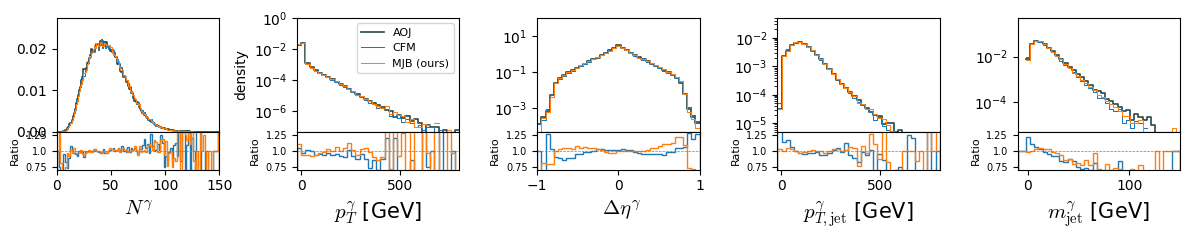

In [129]:
fig, axes = plt.subplots(2, 5, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')


plot_hist_and_ratio(test_photons, 
                    gen_photons, 
                    # gen_mjb_photons, 
                    gen_mjb1_photons,
                    axes[0, 0], axes[1, 0], feat='numPhotons', xlim=(0, 150), ylim=(0, 0.0275), xlabel= r'$N^{\gamma}$', discrete=True)

plot_hist_and_ratio(test_photons.constituents, 
                    gen_photons.constituents, 
                    # gen_mjb_photons.constituents,
                    gen_mjb1_photons.constituents,
                    axes[0, 1], axes[1, 1], feat='pt', xlim=(-20,800), ylim=(5e-8, 1),  num_bins=40, xlabel=r'$p_{T}^{\gamma}$ [GeV]', ylabel='density', legend1='CFM', legend2='MJB (ours)', log_scale=(False, True))
                    
plot_hist_and_ratio(test_photons.constituents, 
                    gen_photons.constituents, 
                    # gen_mjb_photons.constituents, 
                    gen_mjb1_photons.constituents, 
                    axes[0, 2], axes[1, 2], feat='eta_rel', xlim=(-1,1), ylim=(5e-5, 100),  num_bins=40, xlabel=r' $\Delta\eta^{\gamma}$', log_scale=(False, True))

plot_hist_and_ratio(test_photons, 
                    gen_photons, 
                    # gen_mjb_photons, 
                    gen_mjb1_photons, 
                    axes[0, 3], axes[1, 3], feat='pt', xlim=(-20,800), ylim=(5e-6, 5e-2),  num_bins=40, xlabel=r'$p_{T, \rm jet}^{\gamma}$ [GeV]', log_scale=(False, True))

plot_hist_and_ratio(test_photons, 
                    gen_photons, 
                    # gen_mjb_photons,
                    gen_mjb1_photons, 
                    axes[0, 4], axes[1, 4], feat='m', xlim=(-10, 150), ylim=(5e-6, .5), num_bins=40,  xlabel=r'$m^{\gamma}_{\rm jet}$ [GeV]', log_scale=(False, True))

plt.tight_layout()
plt.savefig("photons_jets.png", dpi=500)
plt.show()



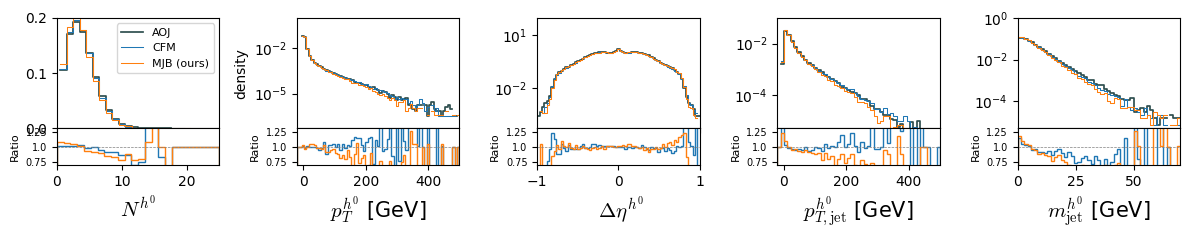

In [130]:
fig, axes = plt.subplots(2, 5, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')

plot_hist_and_ratio(test_neutral_hadrons, 
                    gen_neutral_hadrons, 
                    # gen_mjb_neutral_hadrons, 
                    gen_mjb1_neutral_hadrons,
                    axes[0, 0], axes[1, 0], feat='numNeutralHadrons', xlim=(0, 25), ylim=(0, 0.2), num_bins=25, xlabel= r'$N^{h^0}$', discrete=True, legend1='CFM', legend2='MJB (ours)',)

plot_hist_and_ratio(test_neutral_hadrons.constituents, 
                    gen_neutral_hadrons.constituents, 
                    # gen_mjb_neutral_hadrons.constituents,
                    gen_mjb1_neutral_hadrons.constituents,
                    axes[0, 1], axes[1, 1], feat='pt', xlim=(-20,500), ylim=(5e-8, 1),  num_bins=70, xlabel=r'$p_{T}^{h^0}$ [GeV]', ylabel='density', log_scale=(False, True))
                    
plot_hist_and_ratio(test_neutral_hadrons.constituents, 
                    gen_neutral_hadrons.constituents, 
                    # gen_mjb_neutral_hadrons.constituents, 
                    gen_mjb1_neutral_hadrons.constituents,
                    axes[0, 2], axes[1, 2], feat='eta_rel', xlim=(-1,1), ylim=(5e-5, 100),  num_bins=70, xlabel=r' $\Delta\eta^{h^0}$', log_scale=(False, True))

plot_hist_and_ratio(test_neutral_hadrons, 
                    gen_neutral_hadrons, 
                    # gen_mjb_neutral_hadrons, 
                    gen_mjb1_neutral_hadrons,
                    axes[0, 3], axes[1, 3], feat='pt', xlim=(-20,500), ylim=(5e-6, 1e-1),  num_bins=50, xlabel=r'$p_{T, \rm jet}^{h^0}$ [GeV]', log_scale=(False, True))

plot_hist_and_ratio(test_neutral_hadrons, 
                    gen_neutral_hadrons, 
                    # gen_mjb_neutral_hadrons, 
                    gen_mjb1_neutral_hadrons,
                    axes[0, 4], axes[1, 4], feat='m', xlim=(0, 70), ylim=(5e-6, 1), num_bins=50,  xlabel=r'$m^{h^0}_{\rm jet}$ [GeV]', log_scale=(False, True))

plt.tight_layout()
plt.savefig("neutral_hadrons_jets.png", dpi=500)
plt.show()

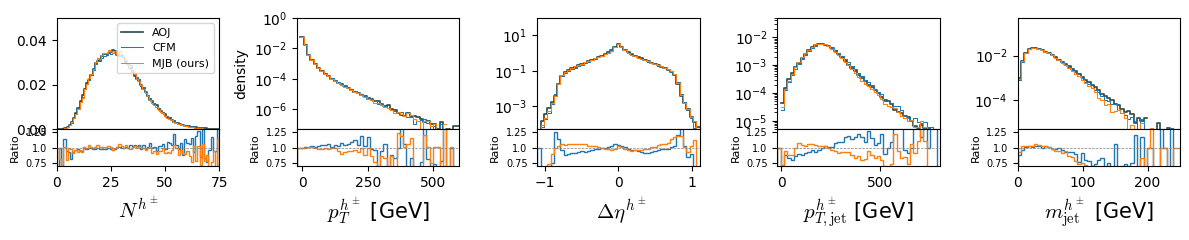

In [135]:
fig, axes = plt.subplots(2, 5, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')

plot_hist_and_ratio(test_charged_hadrons, 
                    gen_charged_hadrons, 
                    # gen_mjb_charged_hadrons, 
                    gen_mjb1_charged_hadrons,
                    axes[0, 0], axes[1, 0], feat='numChargedHadrons', xlim=(0, 75), ylim=(0, 0.05), num_bins=75, xlabel= r'$N^{h^\pm}$', discrete=True, legend1='CFM', legend2='MJB (ours)')

plot_hist_and_ratio(test_charged_hadrons.constituents, 
                    gen_charged_hadrons.constituents, 
                    # gen_mjb_charged_hadrons.constituents,
                    gen_mjb1_charged_hadrons.constituents,
                    axes[0, 1], axes[1, 1], feat='pt', xlim=(-20,600), ylim=(5e-8, 1),  num_bins=50, xlabel=r'$p_{T}^{h^\pm}$ [GeV]', ylabel='density', log_scale=(False, True))
                    
plot_hist_and_ratio(test_charged_hadrons.constituents, 
                    gen_charged_hadrons.constituents, 
                    # gen_mjb_charged_hadrons.constituents, 
                    gen_mjb1_charged_hadrons.constituents,
                    axes[0, 2], axes[1, 2], feat='eta_rel', xlim=(-1.1,1.1), ylim=(5e-5, 100),  num_bins=50, xlabel=r' $\Delta\eta^{h^\pm}$', log_scale=(False, True))

plot_hist_and_ratio(test_charged_hadrons, 
                    gen_charged_hadrons, 
                    # gen_mjb_charged_hadrons, 
                    gen_mjb1_charged_hadrons,
                    axes[0, 3], axes[1, 3], feat='pt', xlim=(-20,800), ylim=(5e-6, 5e-2),  num_bins=50, xlabel=r'$p_{T, \rm jet}^{h^\pm}$ [GeV]', log_scale=(False, True))

plot_hist_and_ratio(test_charged_hadrons, 
                    gen_charged_hadrons, 
                    # gen_mjb_charged_hadrons, 
                    gen_mjb1_charged_hadrons,
                    axes[0, 4], axes[1, 4], feat='m', xlim=(0, 250), ylim=(5e-6, .5), num_bins=50,  xlabel=r'$m^{h^\pm}_{\rm jet}$ [GeV]', log_scale=(False, True))

plt.tight_layout()
plt.savefig("charged_hadrons_jets.png", dpi=500)
plt.show()


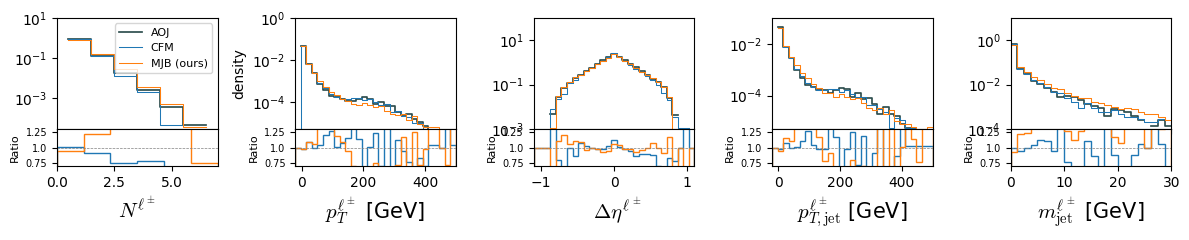

In [134]:
fig, axes = plt.subplots(2, 5, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')


plot_hist_and_ratio(test_leptons, 
                    gen_leptons, 
                    # gen_mjb_leptons, 
                    gen_mjb1_leptons,
                    axes[0, 0], axes[1, 0], feat='numLeptons', xlim=(0, 7), ylim=(0, 10.0), num_bins=7, xlabel= r'$N^{\ell^\pm}$', discrete=True, legend1='CFM', legend2='MJB (ours)', log_scale=(False, True)), 

plot_hist_and_ratio(test_leptons.constituents, 
                    gen_leptons.constituents, 
                    # gen_mjb_leptons.constituents,
                    gen_mjb1_leptons.constituents,
                    axes[0, 1], axes[1, 1], feat='pt', xlim=(-20,500), ylim=(5e-6, 1),  num_bins=30, xlabel=r'$p_{T}^{\ell^\pm}$ [GeV]', ylabel='density', log_scale=(False, True))
                    
plot_hist_and_ratio(test_leptons.constituents, 
                    gen_leptons.constituents, 
                    # gen_mjb_leptons.constituents, 
                    gen_mjb1_leptons.constituents,
                    axes[0, 2], axes[1, 2], feat='eta_rel', xlim=(-1.1,1.1), ylim=(1e-3, 100),  num_bins=30, xlabel=r' $\Delta\eta^{\ell^\pm}$', log_scale=(False, True))

plot_hist_and_ratio(test_leptons, 
                    gen_leptons, 
                    # gen_mjb_leptons, 
                    gen_mjb1_leptons,
                    axes[0, 3], axes[1, 3], feat='pt', xlim=(-20,500), ylim=(5e-6, 1e-1),  num_bins=30, xlabel=r'$p_{T, \rm jet}^{\ell^\pm}$ [GeV]', log_scale=(False, True))

plot_hist_and_ratio(test_leptons, 
                    gen_leptons, 
                    # gen_mjb_leptons, 
                    gen_mjb1_leptons,
                    axes[0, 4], axes[1, 4], feat='m', xlim=(0, 30), ylim=(1e-4, 10), num_bins=25,  xlabel=r'$m^{\ell^\pm}_{\rm jet}$ [GeV]', log_scale=(False, True))

plt.tight_layout()
plt.savefig("leptons_jets.png", dpi=500)
plt.show()

In [25]:
import torch as np
import matplotlib.pyplot as plt

from abc import ABC, abstractmethod

class Thermostat(ABC):
    def __init__(self, vocab_size=8):
        self.S = vocab_size

    @abstractmethod
    def _integral(self, t0, t1):
        pass

    def wt0(self, t, gamma):
        wt = self.wt1(t, gamma)
        return wt * self.S / (1 - wt)

    def wt1(self, t, gamma):
        return np.exp(-self.S * gamma * self._integral(t,1))


class ConstantThermostat(Thermostat):
    def _integral(self, t0, t1):
        return t1 - t0

class InverseThermostat(Thermostat):
    def _integral(self, t0, t1):
        return np.log(t1/t0)

class LinearThermostat(Thermostat):
    def _integral(self, t0, t1):
        return (t1**2 - t0**2) / 2

class SineThermostat(Thermostat):
    def _integral(self, t0, t1):
        return np.cos(t0) - np.cos(t1)


def plot_wt(thermostat, gamma_values=[0.01, 0.05, 0.125, 0.25, 0.5, 0.75, 1]):

    t_values = np.linspace(0.001,0.999, 100)

    fig, ax = plt.subplots(1, 3, figsize=(9, 2))

    for gamma in gamma_values:
        w0_values = [thermostat.wt0(t, gamma) for t in t_values]
        ax[0].plot(t_values, w0_values, label=rf"$\gamma=${gamma}")

    for gamma in gamma_values:
        w1_values = [thermostat.wt1(t, gamma) for t in t_values]
        ax[1].plot(t_values, w1_values, label=rf"$\gamma=${gamma}")

    for gamma in gamma_values:
        ratio_values = [thermostat.wt1(t, gamma) / thermostat.wt0(t, gamma) for t in t_values]
        ax[2].plot(t_values, ratio_values, label=rf"$\gamma=${gamma}")
    
    ax[0].set_xlabel(r"t")
    ax[0].set_ylabel(r"$w^0_{1,t}$")
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[1].set_xlabel(r"$t$")
    ax[1].set_ylabel(r"$w^1_{1,t}$")
    ax[2].set_xlabel(r"$t$")
    ax[2].set_ylabel(r"$w^1_{1,t}/w^0_{1,t}$")

    ax[0].set_xlim(0,1)
    ax[0].set_ylim(0,1000)
    ax[1].set_xlim(0,1)
    ax[1].set_ylim(0,1.1)
    
    plt.legend(fontsize=4)
    plt.tight_layout()
    plt.grid()
    plt.show()


/tmp/ipykernel_3357653/1851019033.py:66: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[0].set_xlim(0,1)
/tmp/ipykernel_3357653/1851019033.py:67: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(0,1000)


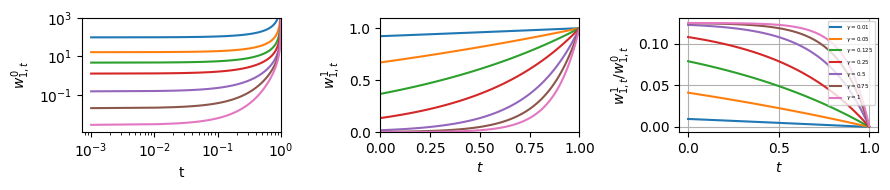

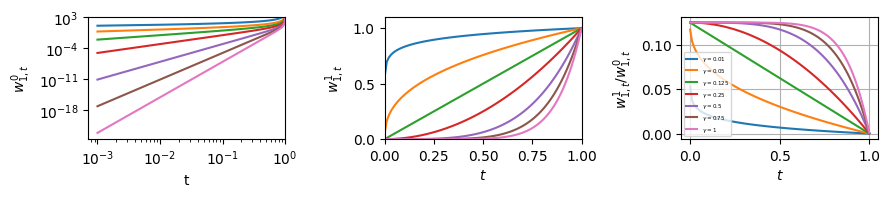

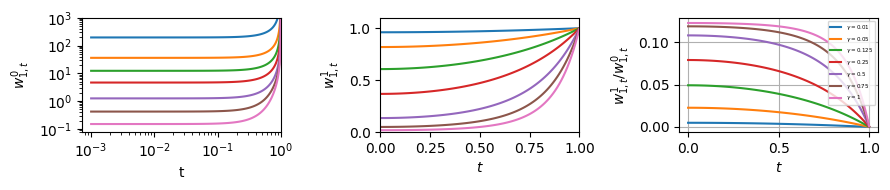

TypeError: cos(): argument 'input' (position 1) must be Tensor, not int

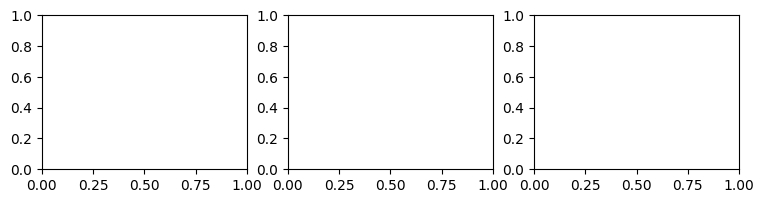

In [26]:
constant = ConstantThermostat()
inverse = InverseThermostat()
linear = LinearThermostat()
sine = SineThermostat()

plot_wt(constant)
plot_wt(inverse)
plot_wt(linear)
plot_wt(sine)
# plot_w0(inverse)
# plot_w1(constant)
# plot_w1(inverse)
